In [20]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

import seaborn as sns

In [36]:
train_set = pd.read_csv("data/treino_total.csv", sep=',', header=0, low_memory=False)
val_set = pd.read_csv("data/val_total.csv", sep=',', header=0, low_memory=False)
test_set = pd.read_csv("data/teste_total.csv", sep=',', header=0, low_memory=False)

In [37]:
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(194598, 247)
(97298, 247)
(97299, 247)


In [6]:
train_set.describe()

,Unnamed: 0,INDEX,UF_1,UF_2,UF_3,UF_4,UF_5,UF_6,UF_7,IDADE,...,CEP4_7,CEP4_8,CEP4_9,CEP4_10,CEP4_11,CEP4_12,CEP4_13,CEP4_14,IND_BOM_1_1,IND_BOM_1_2
count,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,1.946000e+04,...,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000,19460.000000
mean,9730.500000,193774.912230,0.885303,0.696454,0.472405,0.294861,0.249897,0.214748,0.186331,4.531748e-01,...,0.428469,0.421172,0.426773,0.461254,0.436074,0.437153,0.434173,0.439157,0.657503,0.342497
std,5617.762455,112656.597501,0.318664,0.459801,0.499251,0.455992,0.432964,0.410658,0.389383,2.532467e-01,...,0.494870,0.493760,0.494621,0.498509,0.495909,0.496047,0.495661,0.496297,0.474557,0.474557
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.506237e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4865.750000,96163.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.480463e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9730.500000,193451.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.380353e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14595.250000,291593.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.533400e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,19460.000000,389156.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# merge das duas ultimas colunas na coluna 'y'
train_set = train_set.drop('IND_BOM_1_2', 1)
train_set = train_set.rename(columns={'IND_BOM_1_1': 'y'})
val_set = val_set.drop('IND_BOM_1_2', 1)
val_set = train_set.rename(columns={'IND_BOM_1_1': 'y'})
test_set = test_set.drop('IND_BOM_1_2', 1)
test_set = test_set.rename(columns={'IND_BOM_1_1': 'y'})

# encontra as variavies categoricas
for col in train_set.columns:
    if ((train_set[col].quantile() == 1.0) | (train_set[col].quantile() == 0.0)):
        train_set[col] = train_set[col].astype('category')
for col in val_set.columns:
    if ((val_set[col].quantile() == 1.0) | (val_set[col].quantile() == 0.0)):
        val_set[col] = val_set[col].astype('category')
for col in test_set.columns:
    if ((test_set[col].quantile() == 1.0) | (test_set[col].quantile() == 0.0)):
        test_set[col] = test_set[col].astype('category')

# Embaralha os datasets
train_set = train_set.sample(frac=1)
val_set = val_set.sample(frac=1)

In [39]:
train_set.dtypes

Unnamed: 0                           int64
INDEX                                int64
UF_1                              category
UF_2                              category
UF_3                              category
UF_4                              category
UF_5                              category
UF_6                              category
UF_7                              category
IDADE                              float64
SEXO_1                            category
NIVEL_RELACIONAMENTO_CREDITO01     float64
NIVEL_RELACIONAMENTO_CREDITO02    category
BANCO_REST_IRPF_ULTIMA_1          category
BANCO_REST_IRPF_ULTIMA_2          category
BANCO_REST_IRPF_ULTIMA_3          category
BANCO_REST_IRPF_ULTIMA_4          category
BANCO_REST_IRPF_ULTIMA_5          category
BANCO_REST_IRPF_ULTIMA_6          category
BANCO_REST_IRPF_ULTIMA_7          category
ATIVIDADE_EMAIL                    float64
EXPOSICAO_ENDERECO                 float64
EXPOSICAO_EMAIL                   category
EXPOSICAO_T

In [40]:
X_train = train_set.loc[:, train_set.columns != 'y']
y_train = train_set.loc[:, train_set.columns == 'y']
X_val = val_set.loc[:, val_set.columns != 'y']
y_val = val_set.loc[:, val_set.columns == 'y']
X_test = test_set.loc[:, test_set.columns != 'y']
y_test = test_set.loc[:, test_set.columns == 'y']

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [46]:
predicted = rf.predict(X_test.values)
accuracy = accuracy_score(y_test.values, predicted)
print("Out-of-bag score estimate: {:.3}".format(rf.oob_score_))
print("Mean accuracy score: {:.3}".format(accuracy))

Out-of-bag score estimate: 0.791
Mean accuracy score: 0.667


In [ ]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

,0,1
0,6247,27277
1,5128,58647


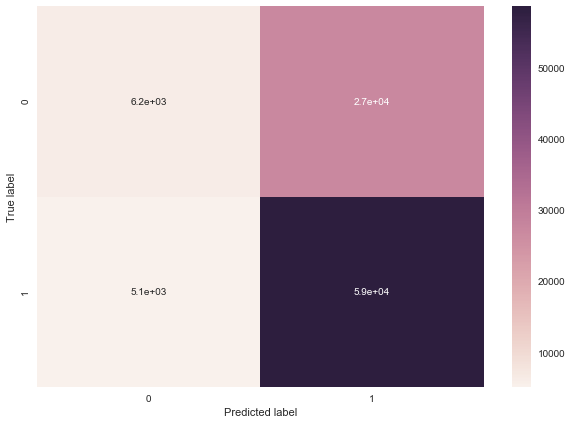

In [44]:
%matplotlib inline
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

#heatmap
cm